# Part I - FORD GOBIKE SYSTEM
## by Abdelhak BENYAHIA

## A. Introduction

> In this notebook you'll find analysis of a dataset that includes information about bike trips made in february 2019 in the San Francisco Bay area by FORD GOBIKE SYSTEM.

> The dataset contain information about :

> - ride time ( date, start time, end time, ride duration..)
- ride stations ( start station , end station)
- rider ( membership, gender ,age)



## B.Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

from datetime import datetime, timedelta


#### Below we are going to load the dataset and getting to know it : 
> - getting to know the columns
- dataset content
- check for nulls and duplicates
- check types of data

In [2]:
# loading the dataset

df_bike = pd.read_csv('201902-fordgobike-tripdata.csv')
df_bike.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# check the shape of the dataset

df_bike.shape

(183412, 16)

In [4]:
# check the information of the dataset (colomns,types,counts,null.. etc)

df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# check dataset for duplicates

df_bike.duplicated().sum()

0

In [6]:
# check dataset for null values

df_bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

## C. Defining problems and solve them

> ### C.a Define problems : 

> - **problem1:** some columns have null values
- **problem2:** some columns have incorrect data types ( start_time,end_time,start_station_id,end_station_id,bike_id )
- **problem3:** we have to add age column so we can use it later 
- **problem4:** we have to convert the duration to minute to facilitate calculation and add seperate column for the hour and day to use it later in the analysis

In [7]:
#making copy of the dataset 

df_bike_copy = df_bike.copy()

> ### C.b Start solving identified problems


> **C.b.1. problem 1 : droping missing values**

In [8]:
# droping missing values 

df_bike_copy.dropna(axis=0,inplace=True)

In [9]:
# test and check

df_bike_copy.shape

(174952, 16)

In [10]:
# test and check

df_bike_copy.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

> **C.b.2.problem 2 : correcting data types**

In [11]:
# convert start_time and end_time to time type

df_bike_copy['start_time'] = pd.to_datetime(df_bike_copy['start_time'])
df_bike_copy['end_time'] = pd.to_datetime(df_bike_copy['end_time'])

# convert the columns (_id) to object type

df_bike_copy['start_station_id'] = df_bike_copy['start_station_id'].astype(str)
df_bike_copy['end_station_id'] = df_bike_copy['end_station_id'].astype(str)
df_bike_copy['bike_id'] = df_bike_copy['bike_id'].astype(str)

# convert birth year to integer

df_bike_copy['member_birth_year'] = df_bike_copy['member_birth_year'].astype(int)

# change the user type and gender to category format 

df_bike_copy['user_type'] = df_bike_copy['user_type'].astype('category')
df_bike_copy['member_gender'] = df_bike_copy['member_gender'].astype('category')

In [12]:
# test and check

df_bike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [13]:
#checking the member gender values
df_bike_copy['member_gender'].unique()

['Male', 'Other', 'Female']
Categories (3, object): ['Female', 'Male', 'Other']

In [14]:
#checking the user type values
df_bike_copy['user_type'].unique()

['Customer', 'Subscriber']
Categories (2, object): ['Customer', 'Subscriber']

In [15]:
#checking the bike share values
df_bike_copy['bike_share_for_all_trip'].unique()

array(['No', 'Yes'], dtype=object)

> **C.b.3 problem 3 : age column**

In [16]:
# adding a calculated column to calculate the age of the users

df_bike_copy['AGE'] = 2019 - df_bike_copy['member_birth_year']
df_bike_copy['AGE'] = df_bike_copy['AGE'].astype(int)

> **PS :** made an honest mistake by calculating the age refering to **2022** in place of **2019** ,
but found this not to be accurate after remembering that the dataset was gathered on **2019** so the age of users must be calculated refering to **2019** .

In [17]:
# test and check 

df_bike_copy.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,AGE
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60


> **C.b.4 problem 4 : duration** 

In [18]:
# Add calculated columns expression the duration (duration in min , start date/hour/day)

df_bike_copy['duration_minute'] = df_bike_copy['duration_sec']/60
df_bike_copy['start_date'] = df_bike_copy.start_time.dt.strftime('%Y-%m-%d')
df_bike_copy['start_hour'] = df_bike_copy.start_time.dt.strftime('%H')
df_bike_copy['start_day'] = df_bike_copy.start_time.dt.strftime('%A')

# convert to suitable types

df_bike_copy['duration_minute'] = df_bike_copy['duration_minute'].astype(int)
df_bike_copy['start_date'] = pd.to_datetime(df_bike_copy['start_date'])
df_bike_copy['start_hour'] = df_bike_copy['start_hour'].astype(int)

In [19]:
# test and check 

df_bike_copy.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,AGE,duration_minute,start_date,start_hour,start_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984,Male,No,35,869,2019-02-28,17,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972,Male,No,47,1030,2019-02-28,12,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989,Other,No,30,608,2019-02-28,17,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,45,26,2019-02-28,23,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959,Male,No,60,29,2019-02-28,23,Thursday


In [20]:
# test and check 
df_bike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [21]:
# make final clean copy for the dataset and export it to csv file in the workspace

df_bike_final = df_bike_copy.copy()
df_bike_final.to_csv('df_bike_final.csv')

### What is the structure of your dataset?

> The final dataset contains 174952 record for Ford Gobike System covering san francisco bay area.
Each record describes a unique trip with its 21 features.
These features are divided in these main features : 

>  - ride time ( duration_sec, duration_min, start_time, end_time, start_date, start_hour, start_day)
 - ride station ( start_station_id, start_station_name , start_station_latitude, start_station_longitude, end_station_id, end_station_name , end_station_latitude, end_station_longitude)
 - rider ( user_type, member_gender , member_birth_year, age)
 - other ( bike_id, bike_share_for_all_trip)


### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in my dataset are the one related to ride time and the one related to the rider.

> **PS:** Since I know I'm curious, I may try to find out which station is the most frequented or which bike is the most used.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> For the features of interest we are going to use the below features 

> - rider ( user_type, member_gender , age)
> - ride time ( duration_min, start_date, start_hour, start_day)

## Univariate Exploration

> In this section, we will investigate distributions of individual variables. If
we see unusual points or outliers, we will take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


**Let's start with the rider features**

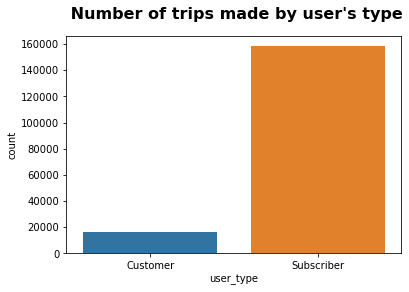

In [22]:
# distribution by user type (subscription)

sb.countplot(data=df_bike_final, x='user_type' )
plt.title(" Number of trips made by user's type", y=1.05, fontsize=16, fontweight='bold');

> **observation :** the system is mostly used by subscribers ( almost 160000 trip made by subscriber vs less than 20000 made by customer)

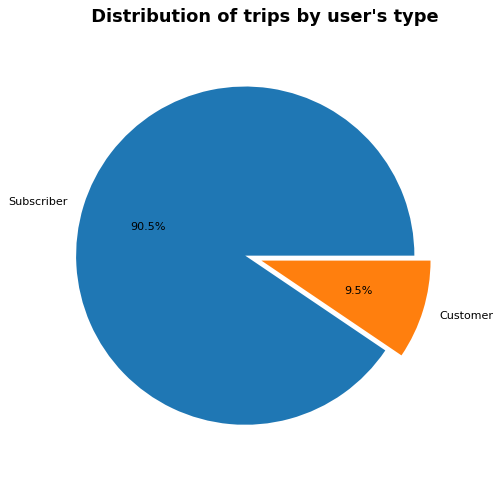

In [23]:
# user type percentage
sorted_type = df_bike_final['user_type'].value_counts()

plt.figure(figsize = [7, 7], dpi= 80, facecolor='w', edgecolor='k')
colors = sb.color_palette()
plt.title(" Distribution of trips by user's type", y=1.05, fontsize=16, fontweight='bold');
explode = (0.1, 0)
plt.pie(
    sorted_type,
    labels = sorted_type.index,
    startangle = 0,
    colors = colors,
    autopct = '%1.1f%%',
    explode=explode,);

plt.show()

> **observation :** over 90% of the trips were made by subscribers

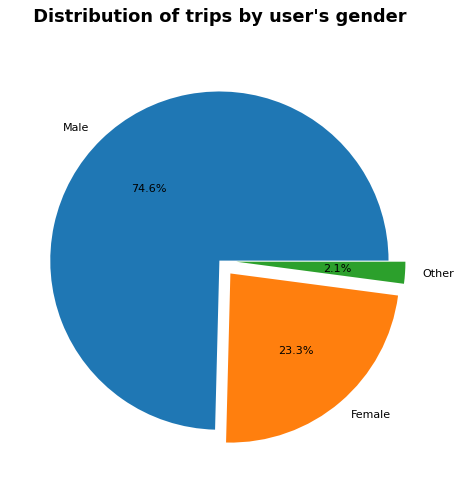

In [24]:
# gender distribution 
sorted_gender = df_bike_final['member_gender'].value_counts()

plt.figure(figsize = [7, 7], dpi= 80, facecolor='w', edgecolor='k')
colors = sb.color_palette()
plt.title(" Distribution of trips by user's gender ", y=1.05, fontsize=16, fontweight='bold');
explode = (0, 0.1, 0.1)
plt.pie(
    sorted_gender,
    labels=sorted_gender.index,
    startangle = 0,
    colors = colors,
    autopct = '%1.1f%%',
    explode=explode,);

plt.show()


> **observation :** almost 75% of the trips were made by males

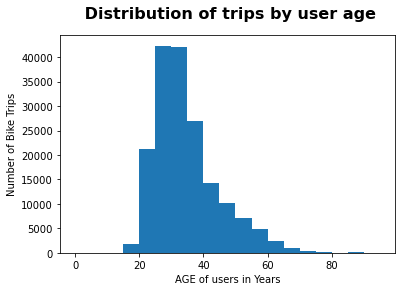

In [25]:
# age distribution 

bin_edges = np.arange(0, 100, 5)
plt.hist(data = df_bike_final, x = 'AGE', bins = bin_edges);
plt.title(" Distribution of trips by user age", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('AGE of users in Years')
plt.ylabel('Number of Bike Trips');


> **observation :** most trips were made by users between 20 and 40 years old in general. The most frequent trips were made by userd in the age interval between 25 and 30.

**Let's continue with the ride time features**

Text(0.5, 1.05, 'Distribution of trips by its duration in minute')

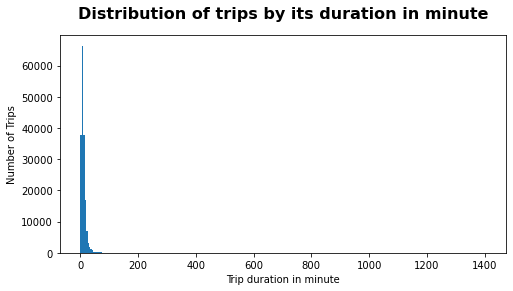

In [26]:
# duration in min 

binsize = 8
bins = np.arange(0, df_bike_final['duration_minute'].max(), 5)

plt.figure(figsize=[8, 4])

plt.hist(data = df_bike_final, x = 'duration_minute', bins=bins)

plt.xlabel('Trip duration in minute')
plt.ylabel('Number of Trips')
plt.title("Distribution of trips by its duration in minute", y=1.05, fontsize=16, fontweight='bold')

Text(0.5, 1.05, 'Distribution of trips by duration in minute')

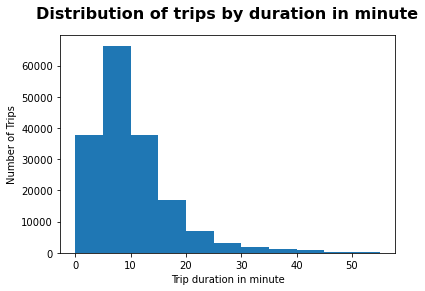

In [27]:
# zooming the minutes data

bins = np.arange(0, 60, 5)
plt.hist(data = df_bike_final, x = 'duration_minute', bins = bins)
plt.xlabel('Trip duration in minute')
plt.ylabel('Number of Trips')
plt.title("Distribution of trips by duration in minute", y=1.05, fontsize=16, fontweight='bold')

> **observation :** most of the trips are not taking more than 15 min. The most frequent trips took between 5 and 10 minutes 

Text(0.5, 1.05, 'Distribution of trips by day of the week ')

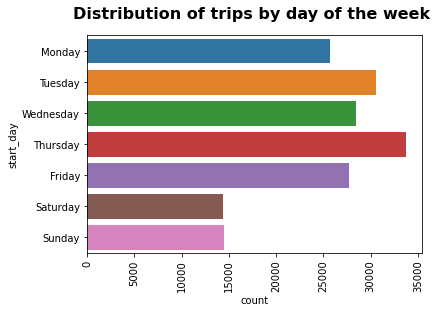

In [28]:
day_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

sb.countplot(data= df_bike_final,y='start_day',order= day_order)
plt.xticks(rotation=90)

plt.title("Distribution of trips by day of the week ", y=1.05, fontsize=16, fontweight='bold')

> **observation :** By observing the distribution of the trips over the week days we can see that **Thursday and Tuesday** were the days in which the system was most used (over 30 000 trip ) while in **the weekend days (sunday and saturday)**  the system was less frequented comparing to the other days

Text(0.5, 1.05, 'Distribution of trips by hours of the day ')

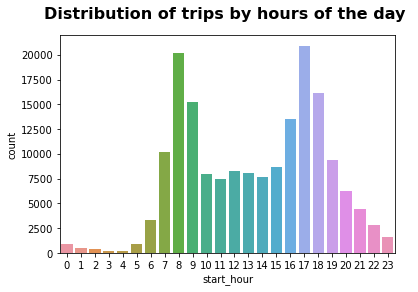

In [29]:
# distribution over the hour of the day

sb.countplot(data= df_bike_final,x='start_hour')

plt.title("Distribution of trips by hours of the day ", y=1.05, fontsize=16, fontweight='bold')


> **observation :** It's obvious that the most frequented hours are the 'rush hours', the hours of going out to work (7,8 and 9 a.m ) and the hours of going out of work (4,5 and 6 p.m)

In [30]:
# start_station with most trips 
 
print(len(df_bike_final['start_station_name'].value_counts()))
df_bike_final['start_station_name'].value_counts().head(5)



329


Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
Name: start_station_name, dtype: int64

> Let's check the end station and if by any chance the top starting ones can be in the top end stations as well ! 🤔

In [31]:
# end_station with most trips 
 
print(len(df_bike_final['end_station_name'].value_counts()))
df_bike_final['end_station_name'].value_counts().head(5)

329


San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
Name: end_station_name, dtype: int64

Text(0.5, 1.05, 'TOP 5 starting trip station')

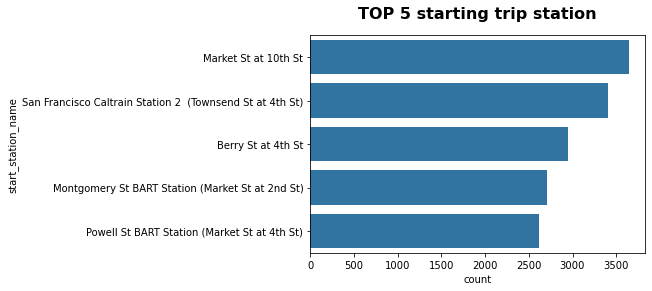

In [32]:
# extracting top 5 start_station with most trips to simplify visualization

locs = ['Market St at 10th St','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Montgomery St BART Station (Market St at 2nd St)','Berry St at 4th St','Powell St BART Station (Market St at 4th St)']
df_top5_start_station = df_bike_final.loc[df_bike_final['start_station_name'].isin(locs)]

#visualize
fig, ax = plt.subplots(figsize=(6,4))
c = sb.color_palette()[0]
o = df_top5_start_station.start_station_name.value_counts().head(50).index
sb.countplot(data=df_top5_start_station , y='start_station_name' , color=c , order=o)
plt.title("TOP 5 starting trip station", y=1.05, fontsize=16, fontweight='bold')


Text(0.5, 1.05, 'TOP 5 ending trip station')

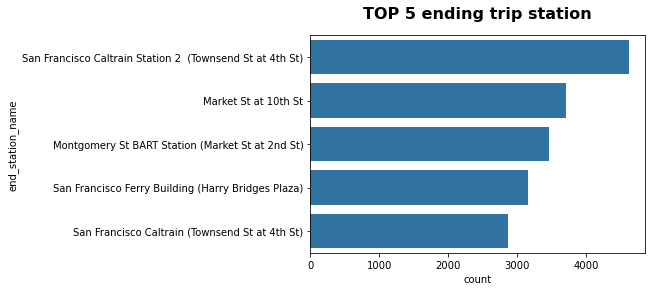

In [33]:
# extracting top 5 end_station with most trips to simplify visualization

locs = ['Market St at 10th St','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Montgomery St BART Station (Market St at 2nd St)','San Francisco Ferry Building (Harry Bridges Plaza)','San Francisco Caltrain (Townsend St at 4th St)']
df_top5_end_station = df_bike_final.loc[df_bike_final['end_station_name'].isin(locs)]

#visualize
fig, ax = plt.subplots(figsize=(6,4))
c = sb.color_palette()[0]
o = df_top5_end_station.end_station_name.value_counts().head(50).index
sb.countplot(data=df_top5_end_station , y='end_station_name' , color=c , order=o)
plt.title("TOP 5 ending trip station", y=1.05, fontsize=16, fontweight='bold')

Almost as expected, two stations were the most frequented in starting the trip and ending it : 

* **San francisco Caltrain Station 2(Towsend St at 4th St)** : 2nd most starting station but the 1st as the end station by far so we can say that it's the most frequented station in general.
* **Market St at 10th St** : the most frequented station as starting the trip and 2nd most frequented station as ending point.

> I'm getting curious to see the usage of bikes ! 

In [34]:
# most bike doing trips 
 
print(len(df_bike_final['bike_id'].value_counts()))
df_bike_final['bike_id'].value_counts()

4607


4794    179
4814    172
5175    167
4450    166
5145    165
       ... 
350       1
34        1
362       1
1011      1
5067      1
Name: bike_id, Length: 4607, dtype: int64

Text(0.5, 1.05, 'TOP 5 used bikes')

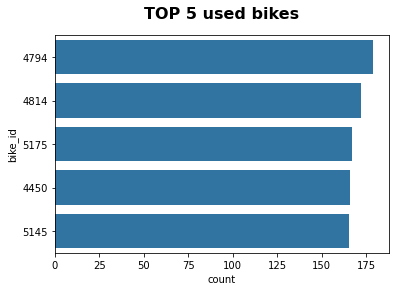

In [35]:
# most used bike 
locs = ['4794','4814','5175','4450','5145']
df_top5_used_bike = df_bike_final.loc[df_bike_final['bike_id'].isin(locs)]

fig, ax = plt.subplots(figsize=(6,4))
c = sb.color_palette()[0]
o = df_top5_used_bike.bike_id.value_counts().head(50).index
sb.countplot(data=df_top5_used_bike , y='bike_id' , color=c , order=o)
plt.title("TOP 5 used bikes", y=1.05, fontsize=16, fontweight='bold')

### The distribution(s) of your variable(s) of interest. 

> * **rider distribution :**
     - 90% of the users are subscribers 
     - the system is used mostly by men : 75% 
     - the system is mostly used by people aged between 20 and 40, especially between 25 and 35
* **ride time :**
     - Most of the rides took less than 15 minutes, a great part of them took between 5 and 10 minutes
     - The system is mostly frequented in Thursday and Tuesday while it is much less used in the weekends
     - The system usage peaked at 'rush hours', between 7 am and 9 am at the morning and between 4 pm and 6 pm in the afternoon.
     - 8 am and 5 pm were the top hours of the day where the system was used.
* **additional interests :**
     - Most two frequented stations were **San francisco Caltrain Station 2(Towsend St at 4th St)** and **Market St at 10th St**
     - Most used bike in february was the one with id 4794, it made 179 trips.
 
### Unusual distributions and changes ? 

> - I was surprised that some bikes made only one trip while others made over 150 trips in the same month
- Also the ride duration was a bit surprising, most of the trips took between 5 and 10 minutes
- I made some changing at the beginning to make the analysis ( added calculated columns such as age, duration in minutes, hour of the trip, day of the trip ..)


## Bivariate Exploration

> In this section, we are going to try and find if the features are related in some how 

> I am goind to see if user type related to other features


* **USER TYPE:**
> **Is the user type and trip duration related ?**

Text(0.5, 1.05, 'User Type and duration relationship')

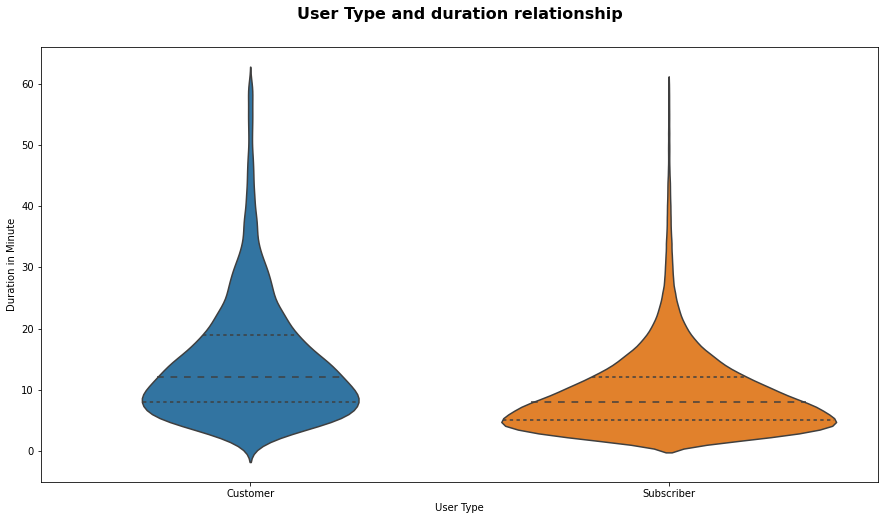

In [36]:
df_bike_duration_under_60 = df_bike_final.query('duration_minute <= 60')
plt.figure(figsize=[15, 8])
sb.violinplot(data=df_bike_duration_under_60, x='user_type', y='duration_minute',inner='quartile')
plt.xlabel('User Type')
plt.ylabel('Duration in Minute')
plt.title("User Type and duration relationship", y=1.05, fontsize=16, fontweight='bold')

> While the system is used mostly by subscribers but we can see that customers tend to spend more time in the trip (double of the time spended by subscribers)

> **Is the user type and trip hours of the day related ?**

> Something is remarquable here is that : 
 - trips of subscribers were made in the rush hours (working hours) between 7 and 9 am, 4 and 6 pm. 
 - customers tend to make trips all day long
 - the system is rarely used after midnight till 5 am by both user type.

> **Is the user type and trip days of the week related ?**

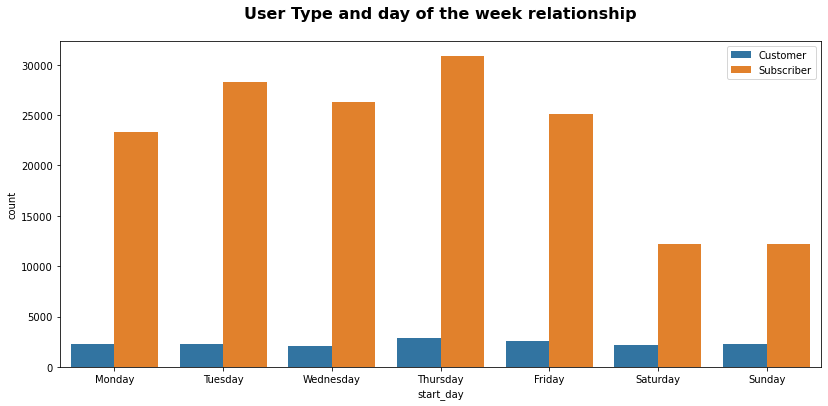

In [37]:
day_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

plt.figure(figsize = [30, 6])
plt.subplot(1, 2, 1)
sb.countplot(data = df_bike_final, x = 'start_day', hue = 'user_type', order= day_order)
plt.legend();
plt.title("User Type and day of the week relationship", y=1.05, fontsize=16, fontweight='bold');

> While subscribers uses the system mostly in working days, the customers use the system almost equally over the days of the week

* **AGE**

> **Is the Age and gender related ?**

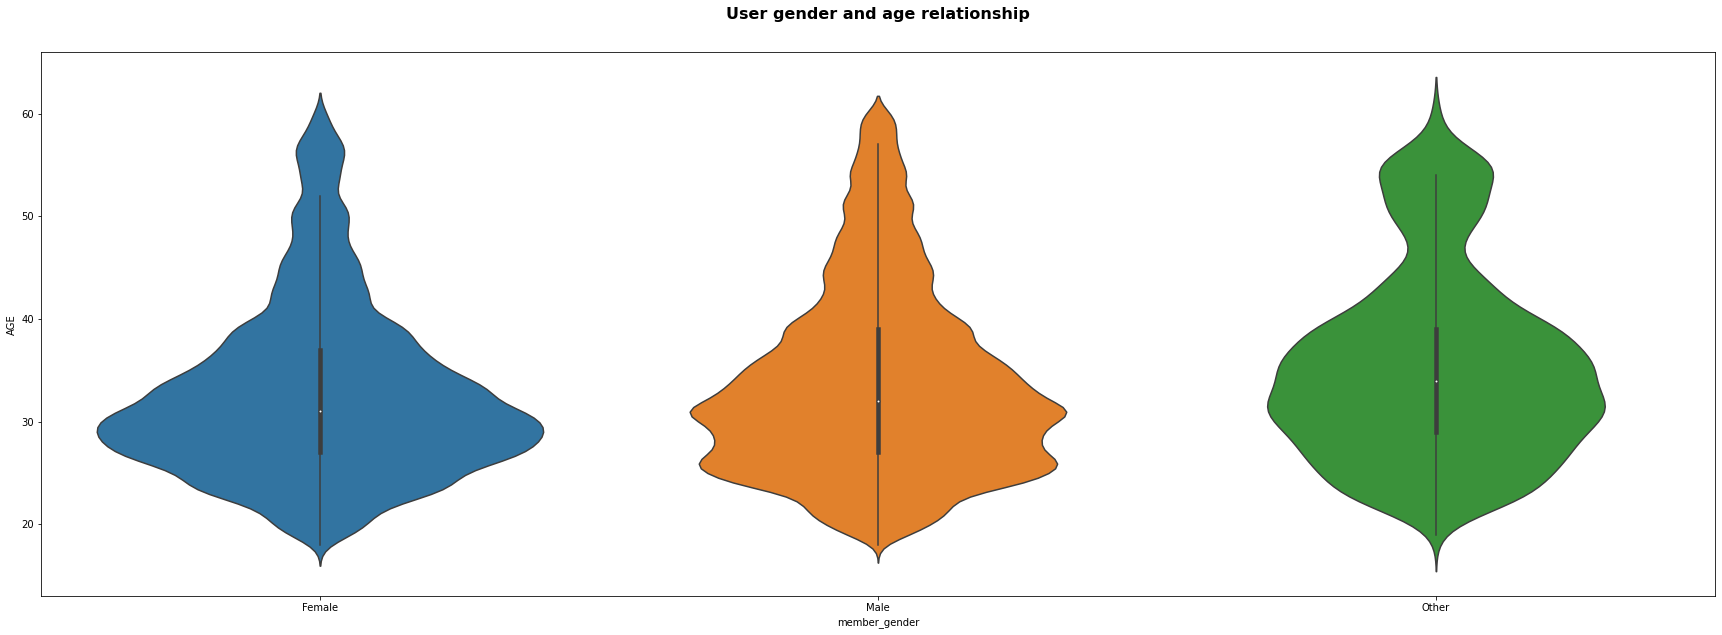

In [38]:
df_bike_age_under_60 = df_bike_final.query('AGE <= 60')
plt.figure(figsize = [30, 10])
sb.violinplot(data=df_bike_age_under_60, x='member_gender', y='AGE')
plt.title("User gender and age relationship", y=1.05, fontsize=16, fontweight='bold');

> Althought there is no huge difference but it seems that 
 - Female aged between 28 and 30 are the most users among the females.
 - Male aged 25 and slightly over 30 (32 or so ) are the most users among other males.

> **Is the Age and user type related ?**

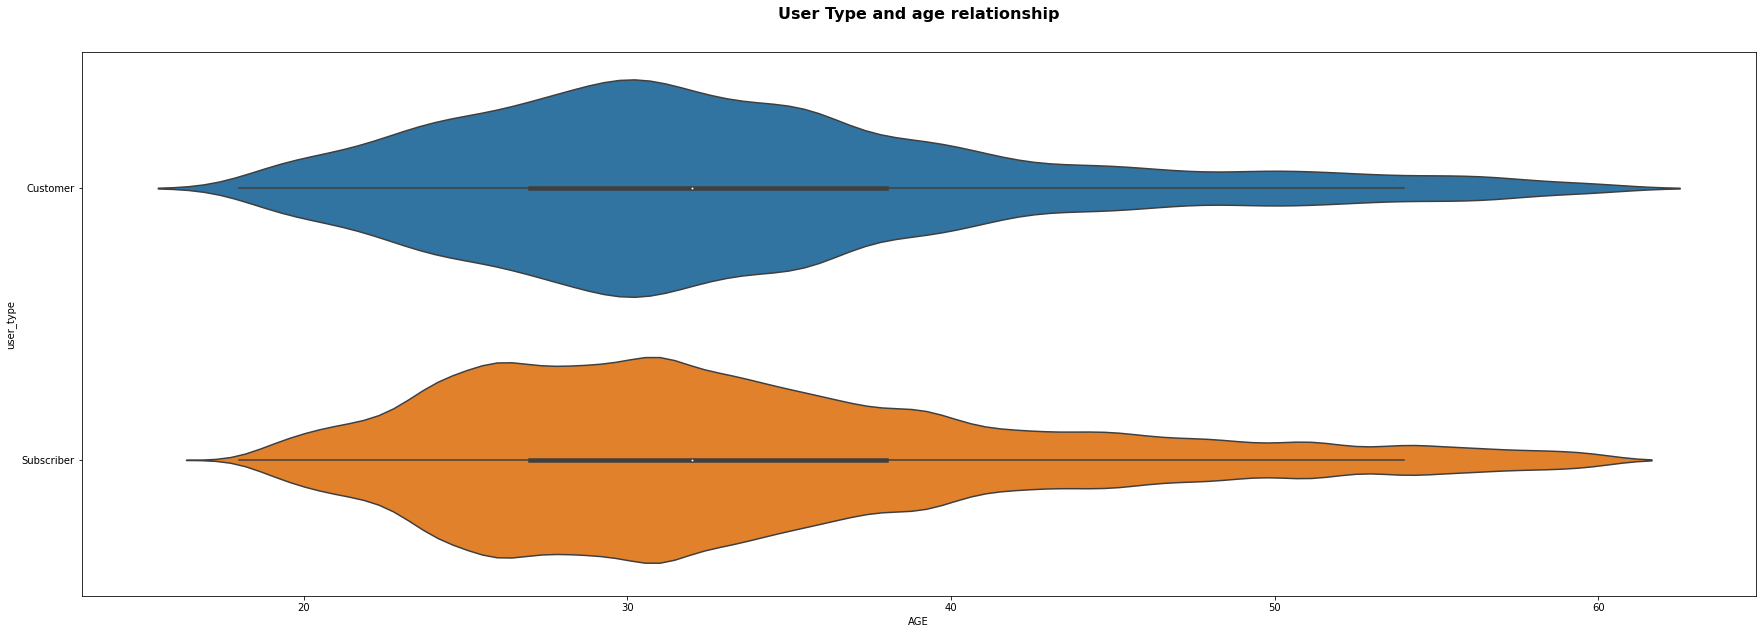

In [39]:
df_bike_age_under_60 = df_bike_final.query('AGE <= 60')
plt.figure(figsize = [30, 10])
sb.violinplot(data=df_bike_age_under_60, x='AGE', y='user_type')
plt.title("User Type and age relationship", y=1.05, fontsize=16, fontweight='bold');

> The system is mostly used by customer around 30, while it's used almost equally by subscribers from the age of 25 until 32 or so 

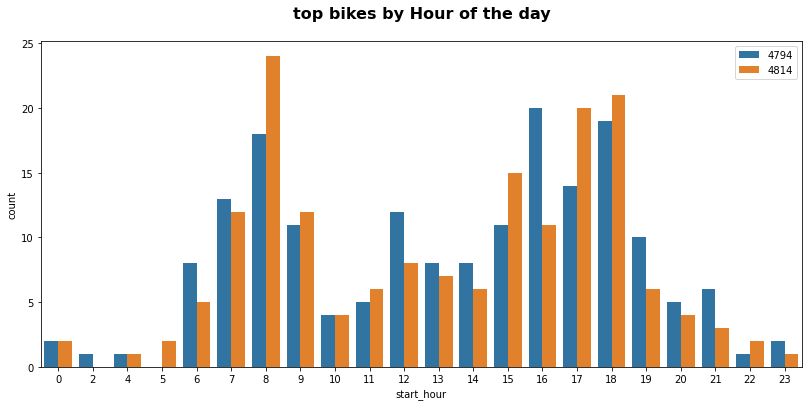

In [40]:
#top 2 bikes used
plt.figure(figsize = [30, 6])
df_bike_4794_4814 = df_bike_final.query("bike_id in ('4794','4814')")
plt.subplot(1, 2, 1)
sb.countplot(data = df_bike_4794_4814, x = 'start_hour', hue = 'bike_id')
plt.legend();
plt.title('top bikes by Hour of the day', y=1.05, fontsize=16, fontweight='bold');

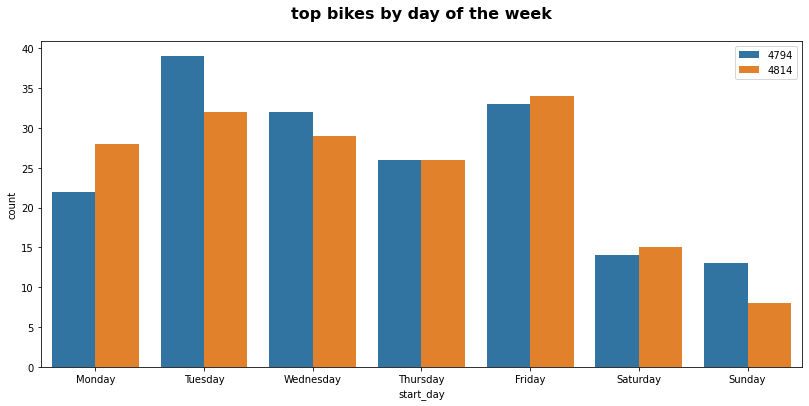

In [41]:
day_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

plt.figure(figsize = [30, 6])
df_bike_4794_4814 = df_bike_final.query("bike_id in ('4794','4814')")
plt.subplot(1, 2, 1)
sb.countplot(data = df_bike_4794_4814, x = 'start_day', hue = 'bike_id', order= day_order)
plt.legend();
plt.title('top bikes by day of the week', y=1.05, fontsize=16, fontweight='bold');

> Here i took the two most used bikes and try to figure out some relationship : distribution in general doesn't differ that much but here are some slight difference i found : 
 * **bike_id 4794 :** For this bike, its peak usage was on **Tuesday** and peak hours were **4pm**, **6 pm** and **8 am** respectively 
 * **bike_id 4814 :** While for this bike, its usage was on **Friday** and peak hours were **8am**, **6pm** and **5pm** respectively

### relationships observed : 


> I can say that :
> * #### USER TYPE
 * **Subscribers :**
    - Tend to use the system in short trips (10 min)
    - Tend to use the system in the rush hours 8 am and 5 pm
    - Tend to use the system mostly in working days
 * **Customers :**
    - Tend to do a longer trips than subscribers
    - Trips are almost equally distributed all day long
    - Trips are almost equally distributed all week long
>*  #### AGE
   * The system is mostly used by people aged between 25 and 35 in general
   * There is no clear relationship between age and gender
   * The system is mostly used by subscribers between 25 and 32 or so in an equal distribution, while it is used by customers mostly aged 30.
  
###  relationships between the secondary features 

>   a slight difference in the most 2 used bikes in their trip days and trip's hour of the day
* bike_id 4794 : For this bike, its peak usage was on Tuesday and peak hours were 4pm, 6 pm and 8 am respectively
* bike_id 4814 : While for this bike, its usage was on Friday and peak hours were 8am, 6pm and 5pm respectively


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

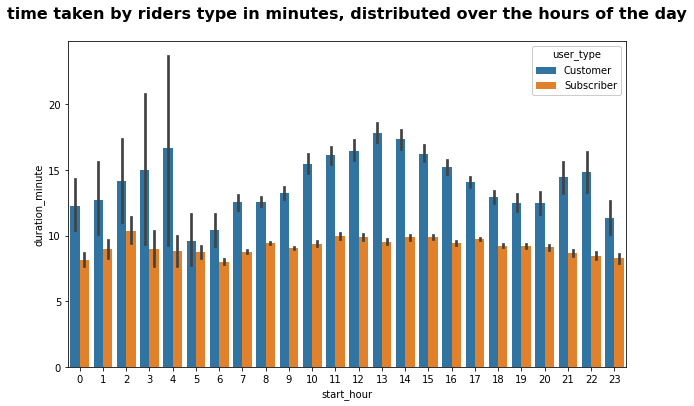

In [42]:
df_bike_duration_under_60 = df_bike_final.query('duration_minute <= 60')
plt.figure(figsize=[10,6])
ax = sb.barplot(data = df_bike_duration_under_60, x = 'start_hour', y = 'duration_minute', hue = 'user_type')
ax.legend(loc = 1, framealpha = 1, title = 'user_type')
plt.title('time taken by riders type in minutes, distributed over the hours of the day', y=1.05, fontsize=16, fontweight='bold');

> subscribers trips took almost 10 minutes whatever the hour of the day is, however for the customers made longer trips at the early hours ( 3 and 4 am ) and mid-day (11,12,1 and 2 pm) around 15 minutes.

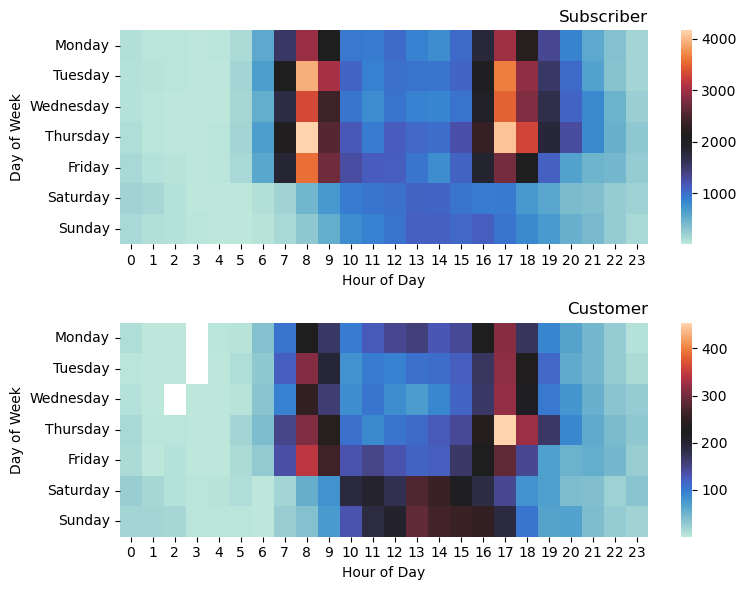

In [43]:
plt.figure(figsize = (8,6), dpi = 100)

plt.subplot(2, 1, 1)
customers = df_bike_final[df_bike_final['user_type'] == "Subscriber"] 
ct_counts = customers.groupby(['start_day', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day', columns='start_hour', values='count')
ct_counts = ct_counts.reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
sb.heatmap(ct_counts, cmap='icefire');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
customers = df_bike_final[df_bike_final['user_type'] == "Customer"] 
ct_counts = customers.groupby(['start_day', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day', columns='start_hour', values='count')
ct_counts = ct_counts.reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
sb.heatmap(ct_counts, cmap='icefire');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.tight_layout()

 * **Subscribers :**
    - Tend to use the system in the rush hours 8 am and 5 pm
    - Tend to use the system mostly in working days. Tuesday and Thursday had the most trips made.
 * **Customers :**
    - Trips are almost equally distributed all day long
    - Tend to use the system especially in the weekends but they do use it also all week long

### features that strengthened each other in terms of looking at my features of interest

> Some of the analysis i've found were strenthened in this part : 
 - customers tend to make longer trips than subscribers 
 - customers tend to use the system less in rush hours
 - most of the subscriber's trips took no more than 10 min  
 - subscribers mostly use the system in working days and working hours per day, 8 am and 5 pm of each day from Monday to Friday
 - Customer mostly use it for fun, they use it a lot in weekend all day long. 



## Conclusions
> * **Top findings :** 
  - 90 % of the users are subscribers while 10% are customers.
  - 75 % of the users are males, 23% are females and 2% for other gender.
  - The system is mostly used by people aged between 20 and 40 especially between 25 and 35.
  - Most of the trips were made by subscribers and didn't took more than 10 minutes.
  - Trips number was at its peak point on rush hours, 8 am and 5 pm to be percise.
  - The system was used in thursday and tuesday more than the other days of the week.
  - Most two frequented stations were San francisco Caltrain Station 2(Towsend St at 4th St) and Market St at 10th St
  - Some of the bikes were used more than others. ( Top 2 : bike_id 4794 and 4814 made more than 170 trip while some the bikes made only one trip at february bike_id 3234 and 302 for example )

> * **Limitation :** The last point made me think that we can do more analysis with further information.
  - We can even help the stakeholders of the company to best handle the fleet of bikes (optimize bikes lifecycle logistically).
  - We can calculate distance made by each bike and which ones are likely soon to need some spare parts to be changed.
  - Or we can propose to change bikes between stations ( take the most used bikes in the most frequented stations this month and replace them by the less used bikes in the less frequented stations) to have some sort of balance.
